Question 01 

In [2]:
import cv2
import numpy as np

# Read the input image
image = cv2.imread('emma_gray.jpg')

# Define the intensity transformation functions
def intensity_transform(x):
    if x <= 50 or x > 150:
        return  x
    else:
        return ((1.55)*x) + (255/(1.55*150))

# Create a lookup table to store the mapping
lut = np.zeros((256, 1), dtype = image.dtype)

# Populate the lookup table
for i in range(256):
    lut[i][0] = intensity_transform(i)

# Apply the intensity transformation using the lookup table
output_image = cv2.LUT(image, lut)

# Save the output image
#cv2.imwrite('output.jpg', output_image)

cv2.imshow("Output Image", output_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Question 02

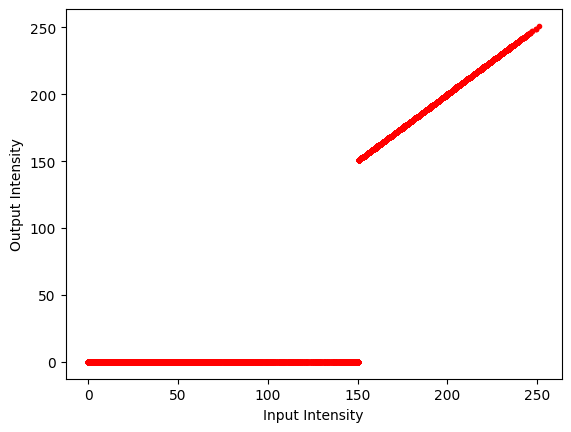

True

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image2 = cv2.imread('brain_proton_density_slice.png', cv2.IMREAD_GRAYSCALE)

#Apply thersholding to seperate white matter and grey matter
ret, thresh = cv2.threshold(image2, 150, 255, cv2.THRESH_BINARY)
grey_matter = cv2.bitwise_and(image2, image2, mask=thresh)
white_matter = cv2.bitwise_and(image2, image2, mask=cv2.bitwise_not(thresh))

#Extract the grey and white matter regions
input_intensities = image2.flatten()
output_grey_matter = grey_matter.flatten()
output_white_matter = white_matter.flatten()


plt.plot(input_intensities, output_grey_matter, 'r.')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.show()

cv2.imwrite('grey_matter.jpg', grey_matter)
cv2.imwrite('white_matter.jpg', white_matter)

Question 03

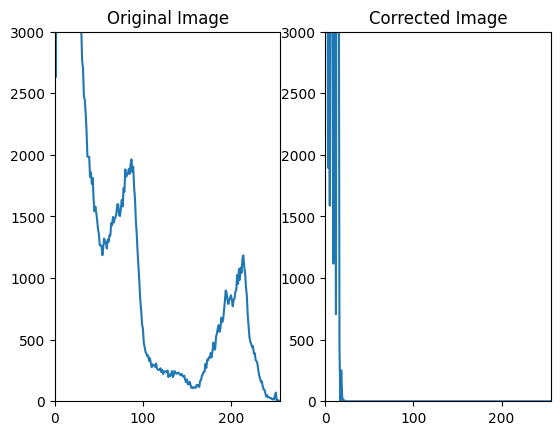

In [1]:
import cv2
import matplotlib.pyplot as plt

# Read in the image and convert it to the L*a*b* color space
image = cv2.imread('highlights_and_shadows.jpg')
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Extract the L plane
l_plane = lab_image[:,:,0]

# Correct the L plane using gamma correction
gamma = 2.0
l_corrected = l_plane**(1/gamma)

# Replace the L plane in the corrected image with the corrected L plane
lab_corrected = lab_image.copy()
lab_corrected[:,:,0] = l_corrected

# Convert the corrected image back to the BGR color space
bgr_corrected = cv2.cvtColor(lab_corrected, cv2.COLOR_LAB2BGR)

# Calculate the histograms of the original and corrected images
hist_original = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_corrected = cv2.calcHist([bgr_corrected], [0], None, [256], [0, 256])

# Plot the histograms
plt.subplot(1, 2, 1)
plt.plot(hist_original)
plt.title('Original Image')
plt.xlim([0, 256])
plt.ylim([0, 3000])
plt.subplot(1, 2, 2)
plt.plot(hist_corrected)
plt.title('Corrected Image')
plt.xlim([0, 256])
plt.ylim([0, 3000])
plt.show()

Question 04

In [2]:
import cv2
import numpy as np

def hist_equalization(shells):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(shells, cv2.COLOR_BGR2GRAY)
    
    # Calculate the cumulative distribution function (CDF) of the image
    hist,bins = np.histogram(gray_image.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    
    # Apply histogram equalization
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    equalized_image = cdf[gray_image]
    
    return equalized_image

image = cv2.imread('shells.png')
cv2.imshow('color image',hist_equalization(image))  
cv2.waitKey(0)


-1

Questin 05 - Nearest-neighbor method

In [3]:
from PIL import Image

def zoom_image(image, zoom_factor):
    # Get the size of the original image
    original_width, original_height = image.size

    print( image.size)

    # Calculate the new size of the image
    new_width = int(original_width * zoom_factor)
    new_height = int(original_height * zoom_factor)


    print(str(new_width) + " " + str(new_height))

    # Create an empty image with the new size
    zoomed_image = Image.new("RGB", (new_width, new_height))
    # Get the pixel data of the original image
    original_pixels = image.load()
    # Get the pixel data of the new image
    zoomed_pixels = zoomed_image.load()
    # Iterate over the new image pixels
    for i in range(new_width):
        for j in range(new_height):
            # Use nearest-neighbor interpolation to determine the color of the new pixel
            x = int(i / zoom_factor)
            y = int(j / zoom_factor)
            zoomed_pixels[i, j] = original_pixels[x, y]
    return zoomed_image

# Open an image file
image = Image.open("a1q5images/im02small.png")
# Zoom the image by a factor of 4
zoomed_image = zoom_image(image, 4)
# Show the zoomed image
zoomed_image.show()

(480, 300)
1920 1200


Questin 05 - Bilinear interpolation method

In [22]:
from PIL import Image

def zoom(img, factor):
    # Get the size of the original image
    width, height = img.size

    # Calculate the new size of the image
    new_width = int(width * factor)
    new_height = int(height * factor)

    # Use the bilinear interpolation algorithm to resize the image
    img = img.resize((new_width, new_height), Image.BILINEAR)

    return img

# Open an image file
img = Image.open("a1q5images/im01small.png")

# Zoom the image by a factor of 2
img_zoomed = zoom(img, 4)
img_zoomed.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_15892\2183017275.py:12: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  img = img.resize((new_width, new_height), Image.BILINEAR)


Question 06 - part a

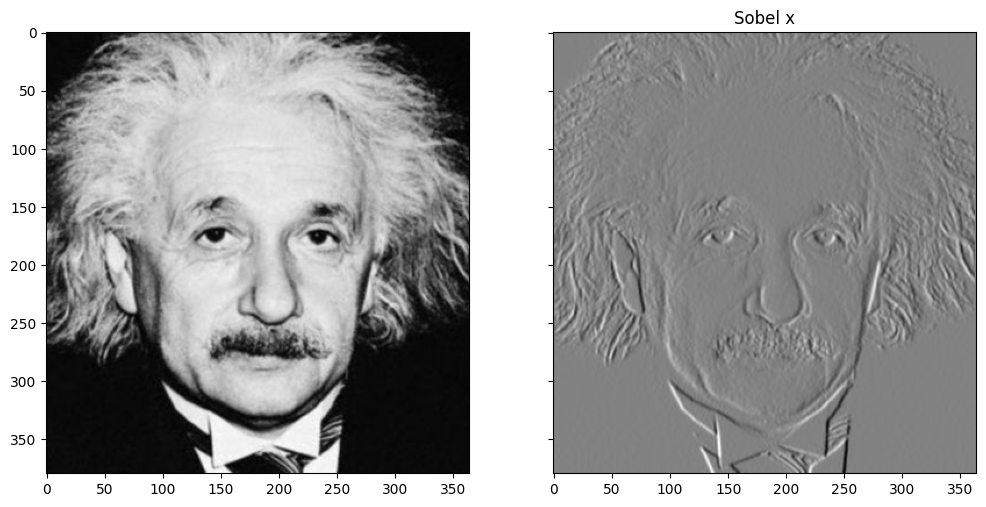

In [33]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img=cv.imread('einstein.png',cv.IMREAD_GRAYSCALE)
assert img is not None

image_float = cv.normalize(img.astype('float'),None,0.0,1.0,cv.NORM_MINMAX) # converting to a float image in[0,1]
grad_x = cv.Sobel(image_float,-1,1,0,ksize=3)
grad_x = cv.normalize(grad_x.astype('float'), None, 0, 1.0, cv.NORM_MINMAX)

fig,ax =plt.subplots(1,2,sharex='all',sharey='all',figsize=(12,12))

ax[0].imshow(img, cmap='gray')
ax[1].imshow(grad_x, cmap='gray')
ax[1].set_title(r'Sobel x')
plt.show()


Question 07

In [28]:
import cv2
import numpy as np

# Read in the image
image = cv2.imread('daisy.jpg')

# Create a rectangular mask that covers the entire image
mask = np.zeros(image.shape[:2], dtype=np.uint8)

# Define the background and foreground model
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

# Define the coordinates of the rectangular mask
rect = (10, 10, image.shape[1]-20, image.shape[0]-20)

# Use grabCut to segment the image
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Create the final segmentation mask
mask = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')

# Multiply the image with the mask to obtain the foreground image
foreground_image = image * mask[:,:,np.newaxis]

# Multiply the inverted mask with the image to obtain the background image
background_image = image * (1-mask[:,:,np.newaxis])
blurred = cv2.GaussianBlur(background_image, (51,51), 0)

newIMG  = foreground_image + blurred

# Show the final segmentation mask, foreground image, and background image
cv2.imshow("Foreground Image", newIMG)
cv2.waitKey(0)
cv2.destroyAllWindows()










